# Random Forest - Classification

## [The banknote authentication Data Set](https://archive.ics.uci.edu/ml/datasets/banknote+authentication)
 Data were extracted from images that were taken for the evaluation of an authentication procedure for banknotes.

  * variance of Wavelet Transformed image (continuous)
  * skewness of Wavelet Transformed image (continuous)
  * curtosis of Wavelet Transformed image (continuous)
  * entropy of image (continuous) 


## Imports

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
df = pd.read_csv("../DATA/data_banknote_authentication.csv")

In [25]:
df.head()

,Variance_Wavelet,Skewness_Wavelet,Curtosis_Wavelet,Image_Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


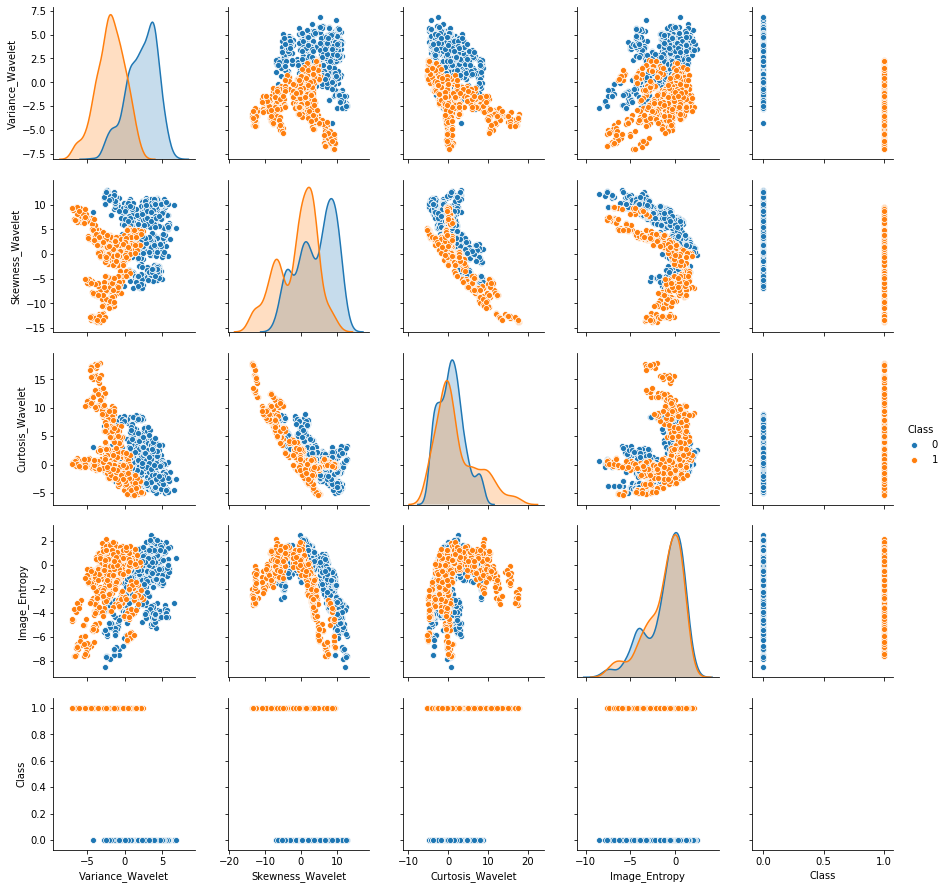

In [27]:
sns.pairplot(data=df,hue='Class')

In [58]:
X = df.drop("Class",axis=1)

In [59]:
y = df["Class"]

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [62]:
from sklearn.model_selection import GridSearchCV

In [63]:
n_estimators=[64,100,128,200]
max_features= [2,3,4]
bootstrap = [True,False]
oob_score = [True,False]

In [64]:
param_grid = {'n_estimators':n_estimators,
             'max_features':max_features,
             'bootstrap':bootstrap,
             'oob_score':oob_score}  # Note, oob_score only makes sense when bootstrap=True!

In [65]:
rfc = RandomForestClassifier()
grid = GridSearchCV(rfc,param_grid)

In [66]:
grid.fit(X_train,y_train)

c:\users\marcial\anaconda_new\envs\ml_master\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\marcial\anaconda_new\envs\ml_master\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\marcial\anaconda_new\envs\ml_master\lib\site-packages\sklearn\ensemble\_forest.py", line 351, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn("Estimator fit failed. The score on this train-test"
c:\users\marcial\anaconda_new\envs\ml_master\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to n

GridSearchCV(estimator=RandomForestClassifier(oob_score=True),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [64, 100, 128, 200]})

In [67]:
grid.best_params_

{'bootstrap': True, 'max_features': 2, 'n_estimators': 64}

In [68]:
predictions = grid.predict(X_test)

In [69]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       124
           1       0.98      1.00      0.99        82

    accuracy                           0.99       206
   macro avg       0.99      0.99      0.99       206
weighted avg       0.99      0.99      0.99       206



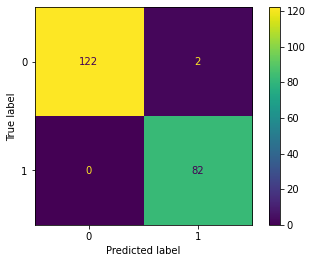

In [70]:
plot_confusion_matrix(grid,X_test,y_test)

In [71]:
# No underscore, reports back original oob_score parameter
grid.best_estimator_.oob_score

True

In [72]:
# With underscore, reports back fitted attribute of oob_score
grid.best_estimator_.oob_score_

0.9939965694682675

## Understanding Number of Estimators (Trees)

Let's plot out error vs. Number of Estimators

In [73]:
from sklearn.metrics import accuracy_score

In [74]:
errors = []
misclassifications = []

for n in range(1,64):
    rfc = RandomForestClassifier( n_estimators=n,bootstrap=True,max_features= 2)
    rfc.fit(X_train,y_train)
    preds = rfc.predict(X_test)
    err = 1 - accuracy_score(preds,y_test)
    n_missed = np.sum(preds != y_test) # watch the video to understand this line!!
    errors.append(err)
    misclassifications.append(n_missed)

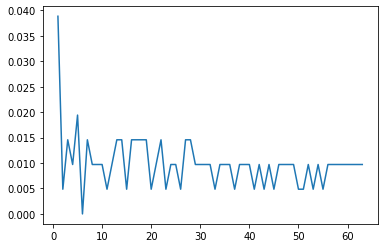

In [75]:
plt.plot(range(1,64),errors)

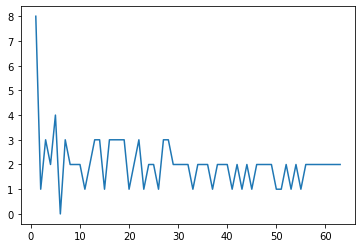

In [76]:
plt.plot(range(1,64),misclassifications)